# Political Ads Visualizations

In [1]:
import pprint
import pickle
import pandas as pd
from datetime import datetime
import numpy as np
import string
from collections import Counter
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option("display.max_columns", 2000)
pd.set_option("display.max_rows", 2000)

In [2]:
pres_df = pd.read_pickle('data/pres_sorted_data.pickle')
pres_df.head()

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   
2   3           5643    KLAS                     Las Vegas, NV   
3   4           5643    WFLA          Tampa-St. Petersburg, FL   
4   5           5643    KSNV                     Las Vegas, NV   

                                  program program_type          start_time  \
0                      8 News Now at 5 PM         news 2016-09-09 00:12:59   
1            North Carolina News at 500PM         news 2016-09-06 21:58:25   
2                         Face the Nation         news 2016-09-04 16:24:25   
3                       Days of Our Lives     not news 2016-08-30 17:59:20   
4  The Tonight Show Starring Jimmy Fallon         news 2016-09-06 07:02:22   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   
2 2016-09-04 16:24:55  PolAd_HillaryClinton_f1h3j   
3 2016-08-30 17:59:50  PolAd_HillaryClinton_f1h3j   
4 2016-09-06 07:02:52  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
2  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
3  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
4  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
2      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
3      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
4      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   
2     pro 2016-09-12 14:49:32       30.0      Sunday   
3     pro 2016-09-12 14:49:32       30.0     Tuesday   
4     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  
0                    Las Vegas    NV            3.0  
1  Raleigh-Durham-Fayetteville    NC            3.0  
2                    Las Vegas    NV            3.0  
3         Tampa-St. Petersburg    FL            3.0  
4                    Las Vegas    NV            3.0

In [3]:
# creating 'hour_aired' - day of week that ad aired

pres_df['hour_aired'] = pres_df['start_time'].map(lambda x: int(x.strftime("%H")))
pres_df.head(5)

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   
2   3           5643    KLAS                     Las Vegas, NV   
3   4           5643    WFLA          Tampa-St. Petersburg, FL   
4   5           5643    KSNV                     Las Vegas, NV   

                                  program program_type          start_time  \
0                      8 News Now at 5 PM         news 2016-09-09 00:12:59   
1            North Carolina News at 500PM         news 2016-09-06 21:58:25   
2                         Face the Nation         news 2016-09-04 16:24:25   
3                       Days of Our Lives     not news 2016-08-30 17:59:20   
4  The Tonight Show Starring Jimmy Fallon         news 2016-09-06 07:02:22   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   
2 2016-09-04 16:24:55  PolAd_HillaryClinton_f1h3j   
3 2016-08-30 17:59:50  PolAd_HillaryClinton_f1h3j   
4 2016-09-06 07:02:52  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
2  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
3  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
4  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
2      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
3      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
4      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   
2     pro 2016-09-12 14:49:32       30.0      Sunday   
3     pro 2016-09-12 14:49:32       30.0     Tuesday   
4     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  hour_aired  
0                    Las Vegas    NV            3.0           0  
1  Raleigh-Durham-Fayetteville    NC            3.0          21  
2                    Las Vegas    NV            3.0          16  
3         Tampa-St. Petersburg    FL            3.0          17  
4                    Las Vegas    NV            3.0           7

In [4]:
pres_df['hour_aired'].dtypes

dtype('int64')

In [5]:
pres_df['subjects'][0], type(pres_df['subjects'][0])

('Energy, China, Jobs', str)

In [6]:
pres_df['subjects'][0].split()

['Energy,', 'China,', 'Jobs']

In [7]:
# Creating a list of topics and then get a counter dictionary

# first convert to strings

pres_df['split_subjects_tmp'] = pres_df['subjects'].map(lambda x: str(x).split(','))
pres_df.head(5)

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   
2   3           5643    KLAS                     Las Vegas, NV   
3   4           5643    WFLA          Tampa-St. Petersburg, FL   
4   5           5643    KSNV                     Las Vegas, NV   

                                  program program_type          start_time  \
0                      8 News Now at 5 PM         news 2016-09-09 00:12:59   
1            North Carolina News at 500PM         news 2016-09-06 21:58:25   
2                         Face the Nation         news 2016-09-04 16:24:25   
3                       Days of Our Lives     not news 2016-08-30 17:59:20   
4  The Tonight Show Starring Jimmy Fallon         news 2016-09-06 07:02:22   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   
2 2016-09-04 16:24:55  PolAd_HillaryClinton_f1h3j   
3 2016-08-30 17:59:50  PolAd_HillaryClinton_f1h3j   
4 2016-09-06 07:02:52  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
2  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
3  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
4  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
2      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
3      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
4      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   
2     pro 2016-09-12 14:49:32       30.0      Sunday   
3     pro 2016-09-12 14:49:32       30.0     Tuesday   
4     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  hour_aired  \
0                    Las Vegas    NV            3.0           0   
1  Raleigh-Durham-Fayetteville    NC            3.0          21   
2                    Las Vegas    NV            3.0          16   
3         Tampa-St. Petersburg    FL            3.0          17   
4                    Las Vegas    NV            3.0           7   

        split_subjects_tmp  
0  [Energy,  China,  Jobs]  
1  [Energy,  China,  Jobs]  
2  [Energy,  China,  Jobs]  
3  [Energy,  China,  Jobs]  
4  [Energy,  China,  Jobs]

In [8]:
sub_list = pres_df['split_subjects_tmp'].tolist()

In [9]:
sub_list[0:5]

[['Energy', ' China', ' Jobs'],
 ['Energy', ' China', ' Jobs'],
 ['Energy', ' China', ' Jobs'],
 ['Energy', ' China', ' Jobs'],
 ['Energy', ' China', ' Jobs']]

In [10]:
subject_list = []

for sub in sub_list:
    for s in sub:
        subject_list.append(s.strip())

In [11]:
subject_list

['Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',
 'China',
 'Jobs',
 'Energy',

In [12]:
unique_subjects = set(subject_list)
len(unique_subjects)

72

In [13]:
subject_count = Counter(subject_list)
subject_count

Counter({'Abortion': 2180,
         'Bankruptcy': 195,
         'Bipartisanship': 8187,
         'Campaign Finance': 291,
         'Canddate Biography': 134,
         'Candidate Biography': 54772,
         'Children': 20532,
         'China': 4127,
         'Civil Rights': 8511,
         'Climate Change': 477,
         'Corporations': 1,
         'Crime': 5058,
         'Criminal Justice': 2153,
         'Debates': 105,
         'Debt': 1580,
         'Disability': 9019,
         'Diversity': 110,
         'Drugs': 7,
         'Economy': 11223,
         'Education': 2262,
         'Election': 60,
         'Elections': 167,
         'Energy': 2353,
         'Environment': 810,
         'Ethics': 1,
         'Families': 11632,
         'Federal Budget': 3259,
         'Foreign Policy': 19497,
         'Gambling': 1,
         'Gays and Lesbians': 1825,
         'Guns': 1730,
         'Health Care': 3671,
         'Homeland Security': 3617,
         'Housing': 90,
         'Immigration': 8

In [14]:
# sorting the counting dictionary

sorted(subject_count.items(), key=lambda x: x[1], reverse=True)

[('Candidate Biography', 54772),
 ('Jobs', 20686),
 ('Children', 20532),
 ('Foreign Policy', 19497),
 ('Terrorism', 19304),
 ('Military', 16643),
 ('Women', 15440),
 ('Taxes', 12285),
 ('Families', 11632),
 ('Economy', 11223),
 ('Nuclear', 9577),
 ('Disability', 9019),
 ('Immigration', 8918),
 ('Civil Rights', 8511),
 ('Veterans', 8265),
 ('Bipartisanship', 8187),
 ('Crime', 5058),
 ('China', 4127),
 ('Trade', 4091),
 ('Health Care', 3671),
 ('Homeland Security', 3617),
 ('Islam', 3392),
 ('Federal Budget', 3259),
 ('Workers', 3221),
 ('Legal Issues', 2835),
 ('Energy', 2353),
 ('Education', 2262),
 ('Abortion', 2180),
 ('Criminal Justice', 2153),
 ('Iran', 1943),
 ('Gays and Lesbians', 1825),
 ('Guns', 1730),
 ('Debt', 1580),
 ('Iraq', 1527),
 ('Religion', 1488),
 ('Income', 1484),
 ('Social Security', 1249),
 ('Small Business', 887),
 ('Environment', 810),
 ('Poverty', 612),
 ('nan', 591),
 ('Voting Record', 554),
 ('Supreme Court', 536),
 ('Climate Change', 477),
 ('Police', 393),
 

In [15]:
# Converting counting dictionary to dataframe (practice)

subject_df = pd.DataFrame.from_dict(subject_count, orient='index')
subject_df.head()

0
Marriage             6
education            2
China             4127
Debates            105
Campaign Finance   291

In [16]:
# renaming column

subject_df.rename(columns={subject_df.columns[0]:'Count'}, inplace=True)

In [17]:
subject_df.head()

Count
Marriage              6
education             2
China              4127
Debates             105
Campaign Finance    291

In [18]:
# sorting the `subject_df`

subject_df.sort_values('Count', ascending=False, inplace=True)
subject_df.head(10)

Count
Candidate Biography  54772
Jobs                 20686
Children             20532
Foreign Policy       19497
Terrorism            19304
Military             16643
Women                15440
Taxes                12285
Families             11632
Economy              11223

In [19]:
subject_df['%_total'] = (subject_df['Count'] / subject_df['Count'].sum()) * 100
subject_df.head()

Count    %_total
Candidate Biography  54772  17.302686
Jobs                 20686   6.534787
Children             20532   6.486138
Foreign Policy       19497   6.159178
Terrorism            19304   6.098208

# Preliminary Visualizations

In [20]:
pres_df.head()

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   
2   3           5643    KLAS                     Las Vegas, NV   
3   4           5643    WFLA          Tampa-St. Petersburg, FL   
4   5           5643    KSNV                     Las Vegas, NV   

                                  program program_type          start_time  \
0                      8 News Now at 5 PM         news 2016-09-09 00:12:59   
1            North Carolina News at 500PM         news 2016-09-06 21:58:25   
2                         Face the Nation         news 2016-09-04 16:24:25   
3                       Days of Our Lives     not news 2016-08-30 17:59:20   
4  The Tonight Show Starring Jimmy Fallon         news 2016-09-06 07:02:22   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   
2 2016-09-04 16:24:55  PolAd_HillaryClinton_f1h3j   
3 2016-08-30 17:59:50  PolAd_HillaryClinton_f1h3j   
4 2016-09-06 07:02:52  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
2  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
3  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
4  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
2      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
3      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
4      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   
2     pro 2016-09-12 14:49:32       30.0      Sunday   
3     pro 2016-09-12 14:49:32       30.0     Tuesday   
4     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  hour_aired  \
0                    Las Vegas    NV            3.0           0   
1  Raleigh-Durham-Fayetteville    NC            3.0          21   
2                    Las Vegas    NV            3.0          16   
3         Tampa-St. Petersburg    FL            3.0          17   
4                    Las Vegas    NV            3.0           7   

        split_subjects_tmp  
0  [Energy,  China,  Jobs]  
1  [Energy,  China,  Jobs]  
2  [Energy,  China,  Jobs]  
3  [Energy,  China,  Jobs]  
4  [Energy,  China,  Jobs]

## Using the `fivethirtyeight` Stylesheet

- See `Python Data Science Handbook` - Chapter 4 - page 286-287

In [21]:
# to see what styles are available

plt.style.available[:5]

['seaborn',
 'seaborn-white',
 'ggplot',
 'seaborn-dark-palette',
 'seaborn-colorblind']

In [22]:
# Basic way to call a stylesheet -- but note that once you call it -- will change the style for the rest of
# of the session

plt.style.use('fivethirtyeight')

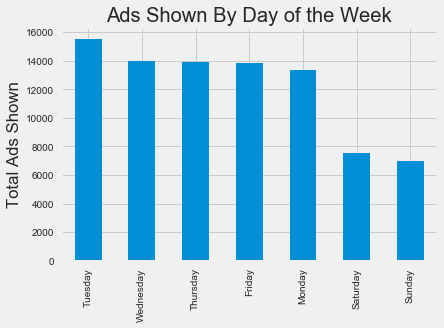

In [23]:
pres_df['day_of_week'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Day of the Week")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_dow.png') # needs to be in the same cell as the code that generates the chart

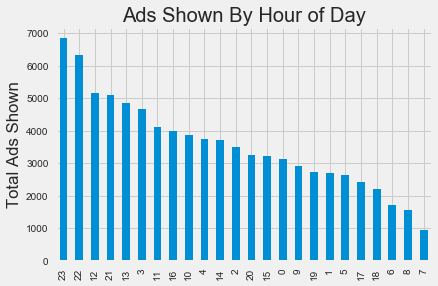

In [24]:
pres_df['hour_aired'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Hour of Day")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_hour.png')

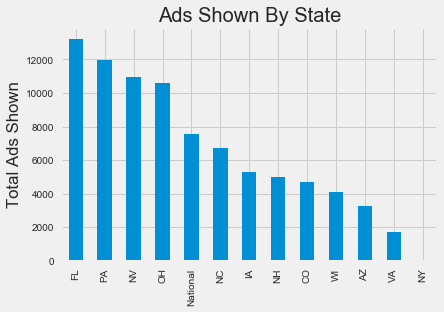

In [25]:
pres_df['state'].value_counts().plot(kind='bar')
plt.title("Ads Shown By State")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_state.png')

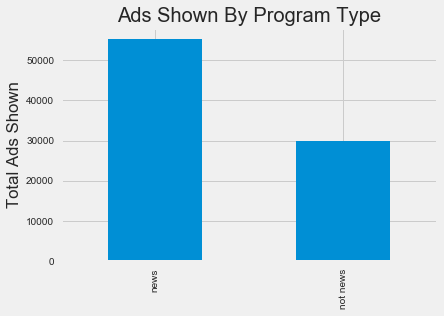

In [26]:
pres_df['program_type'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Program Type")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_program_type.png')

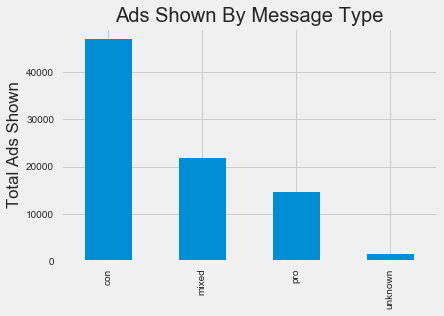

In [27]:
pres_df['message'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Message Type")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_message_type.png')

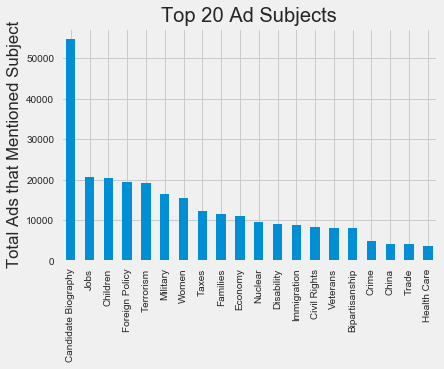

In [28]:
subject_df['Count'].head(20).plot(kind='bar')
plt.title("Top 20 Ad Subjects")
plt.ylabel("Total Ads that Mentioned Subject")
# plt.savefig('proposal_pics/top_20_ad_subjects.png')

# Interesting how far down the list Immigration and Trade are

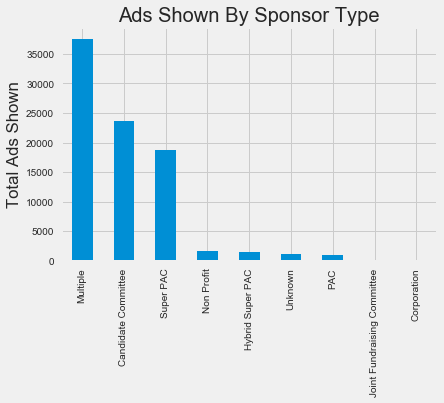

In [29]:
pres_df['sponsor_types'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Sponsor Type")
plt.ylabel("Total Ads Shown")
# plt.savefig('proposal_pics/ads_by_sponsor_type.png')

## Setting Index to Date

- see Python Data Science Handbook, Chapter 3, page 202 - Seattle Bicycle Counts example
- see "Time Series/Date" section of the Pandas online documentation: *http://pandas.pydata.org/pandas-docs/stable/timeseries.html*
- *Python for Data Analysis* by Wes McKinney

In [30]:
pres_date_df = pres_df.copy()
pres_date_df.head(2)

id  wp_identifier network                          location  \
0   1           5643    KLAS                     Las Vegas, NV   
1   2           5643    WNCN  Raleigh-Durham-Fayetteville,  NC   

                        program program_type          start_time  \
0            8 News Now at 5 PM         news 2016-09-09 00:12:59   
1  North Carolina News at 500PM         news 2016-09-06 21:58:25   

             end_time                  archive_id  \
0 2016-09-09 00:13:29  PolAd_HillaryClinton_f1h3j   
1 2016-09-06 21:58:55  PolAd_HillaryClinton_f1h3j   

                                           embed_url             sponsors  \
0  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   
1  https://archive.org/embed/PolAd_HillaryClinton...  Hillary for America   

  sponsor_types  race   cycle             subjects       candidates      type  \
0      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   
1      Multiple  PRES  2016.0  Energy, China, Jobs  Hillary Clinton  campaign   

  message        date_created  ad_length day_of_week  \
0     pro 2016-09-12 14:49:32       30.0      Friday   
1     pro 2016-09-12 14:49:32       30.0     Tuesday   

                    metro_area state  subject_count  hour_aired  \
0                    Las Vegas    NV            3.0           0   
1  Raleigh-Durham-Fayetteville    NC            3.0          21   

        split_subjects_tmp  
0  [Energy,  China,  Jobs]  
1  [Energy,  China,  Jobs]

In [31]:
# start_time column was not sorted -- sorting here in ascending order

pres_date_df.sort_values('start_time', ascending=True, inplace=True)
pres_date_df.head(10)

id  wp_identifier   network                            location  \
207673  261456           6035  FOXNEWSW  San Francisco-Oakland-San Jose, CA   
207667  261450           6035  FOXNEWSW  San Francisco-Oakland-San Jose, CA   
34380    48222           4176      WCAU                    Philadelphia, PA   
34553    48395           4176       KYW                    Philadelphia, PA   
279413  378441           7459    MSNBCW  San Francisco-Oakland-San Jose, CA   
34552    48394           4176      WCAU                    Philadelphia, PA   
279420  378448           7459    MSNBCW  San Francisco-Oakland-San Jose, CA   
207674  261457           6035    MSNBCW  San Francisco-Oakland-San Jose, CA   
279418  378446           7459    MSNBCW  San Francisco-Oakland-San Jose, CA   
34551    48393           4176      WTXF                    Philadelphia, PA   

                                      program program_type  \
207673  On the Record With Greta Van Susteren         news   
207667     Fox News Sunday With Chris Wallace         news   
34380               NBC10 News Today at 430am         news   
34553                  Eyewitness News at 430         news   
279413                             First Look         news   
34552                 NBC10 News Today at 5am         news   
279420                          Way Too Early         news   
207674                            Morning Joe         news   
279418                            Morning Joe         news   
34551             Good Day Philadelphia at 6A         news   

                start_time            end_time                  archive_id  \
207673 2016-08-01 01:19:59 2016-08-01 01:21:04  PolAd_HillaryClinton_4drmd   
207667 2016-08-01 06:20:04 2016-08-01 06:21:09  PolAd_HillaryClinton_4drmd   
34380  2016-08-01 08:39:49 2016-08-01 08:40:21     PolAd_DonaldTrump_99k4w   
34553  2016-08-01 08:48:14 2016-08-01 08:48:46     PolAd_DonaldTrump_99k4w   
279413 2016-08-01 09:09:45 2016-08-01 09:10:15  PolAd_HillaryClinton_4gvic   
34552  2016-08-01 09:24:05 2016-08-01 09:24:37     PolAd_DonaldTrump_99k4w   
279420 2016-08-01 09:39:09 2016-08-01 09:39:39  PolAd_HillaryClinton_4gvic   
207674 2016-08-01 10:26:51 2016-08-01 10:27:56  PolAd_HillaryClinton_4drmd   
279418 2016-08-01 10:27:50 2016-08-01 10:28:20  PolAd_HillaryClinton_4gvic   
34551  2016-08-01 10:29:58 2016-08-01 10:30:30     PolAd_DonaldTrump_99k4w   

                                                embed_url  \
207673  https://archive.org/embed/PolAd_HillaryClinton...   
207667  https://archive.org/embed/PolAd_HillaryClinton...   
34380   https://archive.org/embed/PolAd_DonaldTrump_99k4w   
34553   https://archive.org/embed/PolAd_DonaldTrump_99k4w   
279413  https://archive.org/embed/PolAd_HillaryClinton...   
34552   https://archive.org/embed/PolAd_DonaldTrump_99k4w   
279420  https://archive.org/embed/PolAd_HillaryClinton...   
207674  https://archive.org/embed/PolAd_HillaryClinton...   
279418  https://archive.org/embed/PolAd_HillaryClinton...   
34551   https://archive.org/embed/PolAd_DonaldTrump_99k4w   

                       sponsors sponsor_types  race   cycle  \
207673      Reform America Fund     Super PAC  PRES  2016.0   
207667      Reform America Fund     Super PAC  PRES  2016.0   
34380       Hillary for America      Multiple  PRES  2016.0   
34553       Hillary for America      Multiple  PRES  2016.0   
279413  Make America Number One     Super PAC  PRES  2016.0   
34552       Hillary for America      Multiple  PRES  2016.0   
279420  Make America Number One     Super PAC  PRES  2016.0   
207674      Reform America Fund     Super PAC  PRES  2016.0   
279418  Make America Number One     Super PAC  PRES  2016.0   
34551       Hillary for America      Multiple  PRES  2016.0   

                                                 subjects       candidates  \
207673                                Candidate Biography  Hillary Clinton   
207667                                Candidate Biography  Hillary Clinton   


In [32]:
# Now setting 'start_time' as the index

pres_date_df.set_index('start_time', inplace=True, drop=False)
pres_date_df.head(20)

id  wp_identifier   network  \
start_time                                             
2016-08-01 01:19:59  261456           6035  FOXNEWSW   
2016-08-01 06:20:04  261450           6035  FOXNEWSW   
2016-08-01 08:39:49   48222           4176      WCAU   
2016-08-01 08:48:14   48395           4176       KYW   
2016-08-01 09:09:45  378441           7459    MSNBCW   
2016-08-01 09:24:05   48394           4176      WCAU   
2016-08-01 09:39:09  378448           7459    MSNBCW   
2016-08-01 10:26:51  261457           6035    MSNBCW   
2016-08-01 10:27:50  378446           7459    MSNBCW   
2016-08-01 10:29:58   48393           4176      WTXF   
2016-08-01 10:44:40   47489           4508      WCAU   
2016-08-01 11:22:11   46322           4500      WCAU   
2016-08-01 11:27:38   47484           4508      CNBC   
2016-08-01 11:44:53   47482           4508  FOXNEWSW   
2016-08-01 11:57:22   47469           4508       FBC   
2016-08-01 12:26:02  261458           6035    MSNBCW   
2016-08-01 12:40:42   47487           4508       KYW   
2016-08-01 12:44:19   48390           4176      WTXF   
2016-08-01 12:46:01   48385           4176      WCAU   
2016-08-01 13:28:54   46323           4500  FOXNEWSW   

                                               location  \
start_time                                                
2016-08-01 01:19:59  San Francisco-Oakland-San Jose, CA   
2016-08-01 06:20:04  San Francisco-Oakland-San Jose, CA   
2016-08-01 08:39:49                    Philadelphia, PA   
2016-08-01 08:48:14                    Philadelphia, PA   
2016-08-01 09:09:45  San Francisco-Oakland-San Jose, CA   
2016-08-01 09:24:05                    Philadelphia, PA   
2016-08-01 09:39:09  San Francisco-Oakland-San Jose, CA   
2016-08-01 10:26:51  San Francisco-Oakland-San Jose, CA   
2016-08-01 10:27:50  San Francisco-Oakland-San Jose, CA   
2016-08-01 10:29:58                    Philadelphia, PA   
2016-08-01 10:44:40                    Philadelphia, PA   
2016-08-01 11:22:11                    Philadelphia, PA   
2016-08-01 11:27:38  San Francisco-Oakland-San Jose, CA   
2016-08-01 11:44:53  San Francisco-Oakland-San Jose, CA   
2016-08-01 11:57:22  San Francisco-Oakland-San Jose, CA   
2016-08-01 12:26:02  San Francisco-Oakland-San Jose, CA   
2016-08-01 12:40:42                    Philadelphia, PA   
2016-08-01 12:44:19                    Philadelphia, PA   
2016-08-01 12:46:01                    Philadelphia, PA   
2016-08-01 13:28:54  San Francisco-Oakland-San Jose, CA   

                                                               program  \
start_time                                                               
2016-08-01 01:19:59              On the Record With Greta Van Susteren   
2016-08-01 06:20:04                 Fox News Sunday With Chris Wallace   
2016-08-01 08:39:49                          NBC10 News Today at 430am   
2016-08-01 08:48:14                             Eyewitness News at 430   
2016-08-01 09:09:45                                         First Look   
2016-08-01 09:24:05                            NBC10 News Today at 5am   
2016-08-01 09:39:09                                      Way Too Early   
2016-08-01 10:26:51                                        Morning Joe   
2016-08-01 10:27:50                                        Morning Joe   
2016-08-01 10:29:58                        Good Day Philadelphia at 6A   
2016-08-01 10:44:40                            NBC10 News Today at 6am   
2016-08-01 11:22:11                                              Today   
2016-08-01 11:27:38                                         Squawk Box   
2016-08-01 11:44:53                                        FOX Friends   
2016-08-01 11:57:22                      Mornings With Maria Bartiromo   
2016-08-01 12:26:02                                        Morning Joe   
2016-08-01 12:40:42                                   CBS This Morning   
2016-08-01 12:44:19                        Good Day Philadelphia at 7A   
2016-08-01 12

In [33]:
# using the date index to get Data for Month of October

pres_date_df['2016-8-7']

id  wp_identifier   network  \
start_time                                             
2016-08-07 00:08:38   37532           4621      KTNV   
2016-08-07 01:08:34   37530           4621      KLAS   
2016-08-07 01:20:52   37526           4621      KTNV   
2016-08-07 01:26:30   37529           4621      KLAS   
2016-08-07 04:21:42   37522           4621       KYW   
2016-08-07 04:45:16   56344           3583      KDTV   
2016-08-07 04:47:26   37521           4621      WPVI   
2016-08-07 06:09:24   56345           3583      KSTS   
2016-08-07 06:36:49   56343           3583      KDTV   
2016-08-07 07:00:46  378447           7459       FBC   
2016-08-07 09:05:14   48653           4168       FBC   
2016-08-07 09:08:56   37461           4621      WCAU   
2016-08-07 09:37:51   37519           4621       KYW   
2016-08-07 09:38:50   44376           4685      WCAU   
2016-08-07 09:43:03   37520           4621      WCAU   
2016-08-07 10:22:44   37460           4621      WPVI   
2016-08-07 10:39:29   37518           4621       KYW   
2016-08-07 11:19:38   37307           4621      WPVI   
2016-08-07 11:32:28  443942           8184  FOXNEWSW   
2016-08-07 11:38:34   37315           4621       KYW   
2016-08-07 11:38:38   37817           4621      WCAU   
2016-08-07 12:27:56   37306           4621       KYW   
2016-08-07 12:28:40   37313           4621      WCAU   
2016-08-07 12:45:19   37308           4621      WPVI   
2016-08-07 13:04:59  378443           7459      WTXF   
2016-08-07 13:16:07   37310           4621      WPVI   
2016-08-07 13:42:16   40430           4647      WCAU   
2016-08-07 14:30:25   41487           4664       KYW   
2016-08-07 14:51:54   40642           4653      WFLA   
2016-08-07 15:29:47   37808           4621      KVVU   
2016-08-07 15:41:18   40429           4647      KSNV   
2016-08-07 15:42:12   40431           4647      KNTV   
2016-08-07 16:19:12   37311           4621      WPVI   
2016-08-07 17:09:03   41482           4664  FOXNEWSW   
2016-08-07 20:11:29   41483           4664  FOXNEWSW   
2016-08-07 21:07:06   41481           4664      WCVB   
2016-08-07 21:12:01   41486           4664      WABC   
2016-08-07 21:59:13   40706           4653      WFLA   
2016-08-07 22:00:02   40585           4653      WFLA   
2016-08-07 22:06:14   41484           4664      WCVB   
2016-08-07 22:08:52   37514           4621      WRAL   
2016-08-07 22:09:46   41485           4664      WEWS   
2016-08-07 22:11:16   37515           4621      WEWS   
2016-08-07 22:13:27   37314           4621      WCAU   
2016-08-07 22:18:04   40707           4653      WFTS   
2016-08-07 22:22:02   37516           4621      WKYC   
2016-08-07 22:23:04   37513           4621      WPVI   
2016-08-07 22:25:39   37517           4621      WNCN   
2016-08-07 22:26:15   34026           4827      WFTS   
2016-08-07 22:39:17   37512           4621      WOIO   
2016-08-07 22:58:37   37511           4621      WOIO   
2016-08-07 23:22:39   40705           4653      WFTS   

                                               location  \
start_time                                                
2016-08-07 00:08:38                       Las Vegas, NV   
2016-08-07 01:08:34                       Las Vegas, NV   
2016-08-07 01:20:52                       Las Vegas, NV   
2016-08-07 01:26:30                       Las Vegas, NV   
2016-08-07 04:21:42                    Philadelphia, PA   
2016-08-07 04:45:16  San Francisco-Oakland-San Jose, CA   
2016-08-07 04:47:26                    Philadelphia, PA   
2016-08-07 06:09:24  San Francisco-Oakland-San Jose, CA   
2016-08-07 06:36:49  San Francisco-Oakland-San Jose, CA   
2016-08-07 07:00:46  San Francisco-Oakland-San Jose, CA   
2016-08-07 09:05:14  San Francisco-Oakland-San Jose, CA   
2016-08-07 09:08:56                    Philadelphia, PA   
2016-08-07 09:37:51                    Philadelphia, PA   
2016-08-07 09:38:50                    Philadelphia, PA   
2016-08-07 09:43:03                    Philadelphia, PA 

In [34]:
pres_date_df['message'].unique()

array(['con', 'mixed', 'pro', 'unknown'], dtype=object)

In [35]:
# resampling to get weekly data to smooth out chart - rolling weekly data

weekly_pro = pres_date_df['message'][pres_date_df['message'] == 'pro'].resample('W').count()
weekly_con = pres_date_df['message'][pres_date_df['message'] == 'con'].resample('W').count()
weekly_mixed = pres_date_df['message'][pres_date_df['message'] == 'mixed'].resample('W').count()
weekly_unknown = pres_date_df['message'][pres_date_df['message'] == 'unknown'].resample('W').count()

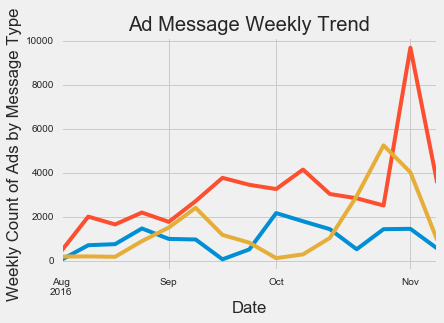

In [36]:
# Using MATLAB-style tools, pyplot interface (pg. 222)

weekly_pro.plot()
weekly_con.plot()
weekly_mixed.plot()
# weekly_unknown.plot()

plt.title("Ad Message Weekly Trend")
plt.xlabel("Date")
plt.ylabel("Weekly Count of Ads by Message Type")
# plt.legend()

# blue = pro
# green = con
# red = mixed
# purple = unknown

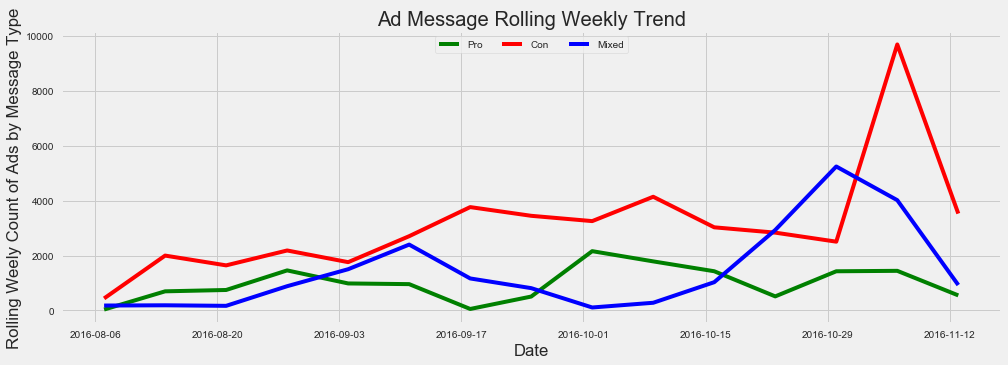

In [37]:
# See Python Data Science Handbook, Chapter 4 (from page 217)
# This is the object-oriented interface -- more control, more powerful

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(weekly_pro.index, weekly_pro.values, '-g', label='Pro')
ax.plot(weekly_con.index, weekly_con.values, '-r', label='Con')
ax.plot(weekly_mixed.index, weekly_mixed.values, '-b', label='Mixed')
ax.legend(frameon=True, loc='upper center', ncol=3) # look at doc string, has the legend location codes
ax.set(xlabel='Date', 
       ylabel='Rolling Weely Count of Ads by Message Type', 
       title='Ad Message Rolling Weekly Trend')
# plt.savefig('proposal_pics/ad_message_wkly_trend.png')

[(0, 16000),

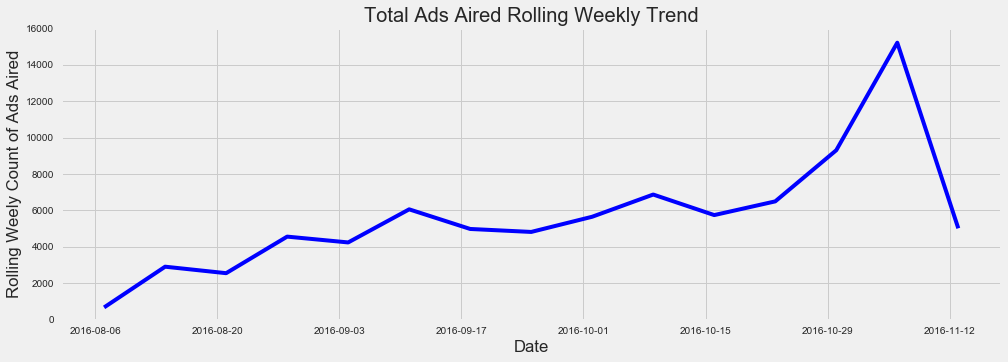

In [38]:
# Rolling Weekly Trend in Ads Aired

wkly_total_aired = pres_date_df['id'].resample('W').count()

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wkly_total_aired.index, wkly_total_aired.values, '-b')
ax.set(xlabel='Date', 
       ylabel='Rolling Weely Count of Ads Aired',
       ylim=(0, 16000),
       title='Total Ads Aired Rolling Weekly Trend')
# plt.savefig('proposal_pics/total_ads_aired_wkly_trend.png')

In [39]:
pres_date_df['sponsors'].unique()

# May have to manually go through each of these sponsors to see who they supported - doable amount - 45
# Also to make apples to apples comps of just sticking to PRES, remove senate ads classified as PRES
# Stick to two major party candidates or continue to include 3rd party candidates -- Johnson/Stein
# Can get candidate committee via visual inspection

array(['Reform America Fund', 'Hillary for America',
       'Make America Number One', 'Rebuilding America Now',
       'NextGen California Action Committee', 'Women Vote!',
       'Reclaim America PAC', 'Priorities USA Action',
       'Donald J Trump For President', 'Kirkpatrick For Senate',
       'Friends of Patrick Murphy', 'MoveOn.org', 'Our Principles PAC',
       'Correct The Record', 'Marco Rubio For Senate 2016',
       'Republican National Cmte', 'Gary Johnson 2016',
       'Great America PAC', 'Stop Hillary PAC', 'National Rifle Assn',
       'Ready for Hillary', 'Democratic Senatorial Campaign Cmte',
       'Purple PAC', 'Jill Stein for President', 'Strickland for Senate',
       'Free the Delegates', 'NARAL Pro-Choice America',
       'American Bridge 21st Century', 'Hillary Victory Fund',
       'Democratic National Cmte', 'Fenton Communications Inc',
       'America Rising PAC', 'NextGen Climate Action', 'Save the Day PAC',
       'Future45', 'Donald J. Trump For Preside

In [40]:
pres_date_df['sponsors'].nunique()

45

In [41]:
pres_date_df['sponsor_types'].unique()

array(['Super PAC', 'Multiple', 'PAC', 'Candidate Committee',
       'Hybrid Super PAC', 'Unknown', 'Joint Fundraising Committee',
       'Corporation', 'Non Profit'], dtype=object)

In [42]:
# Trend in sponsor type
# resampling to get weekly data to smooth out chart - rolling weekly data

wkly_candidate = pres_date_df['sponsor_types'][pres_date_df['sponsor_types'] == 'Candidate Committee'].resample('W').count()
wkly_PAC = pres_date_df['sponsor_types'][(pres_date_df['sponsor_types'] == 'Super PAC') | 
                                         (pres_date_df['sponsor_types'] == 'PAC') |
                                         (pres_date_df['sponsor_types'] == 'Hybrid Super PAC')
                                        ].resample('W').count()

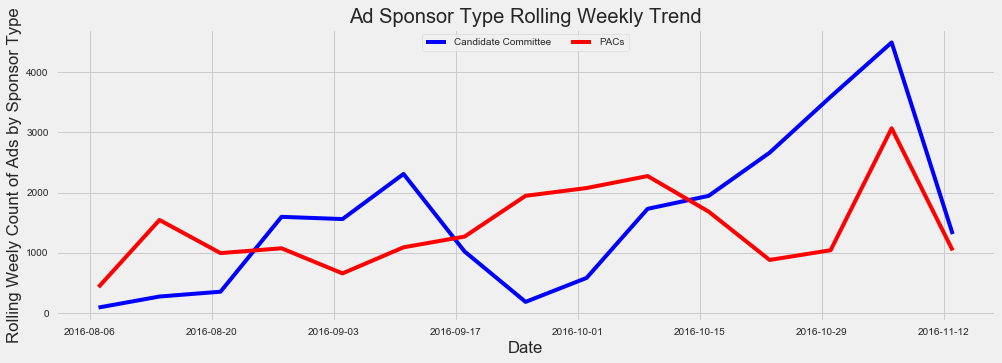

In [43]:
# Ad Sponsor Type

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(wkly_candidate.index, wkly_candidate.values, '-b', label='Candidate Committee')
ax.plot(wkly_PAC.index, wkly_PAC.values, '-r', label='PACs')
ax.legend(frameon=True, loc='upper center', ncol=2) # look at doc string, has the legend location codes
ax.set(xlabel='Date', 
       ylabel='Rolling Weely Count of Ads by Sponsor Type', 
       title='Ad Sponsor Type Rolling Weekly Trend')
# plt.savefig('proposal_pics/sponsor_type_wkly_trend.png')

In [44]:
# Who funded the mud? -- Mask proof of concept

pres_date_df[(pres_date_df['message'] == 'con') & (pres_date_df['sponsor_types'] == 'Candidate Committee')].head(2)

id  wp_identifier   network  \
start_time                                            
2016-08-02 01:21:04  48656           4168  FOXNEWSW   
2016-08-02 13:46:27   3767           5495  FOXNEWSW   

                                               location  \
start_time                                                
2016-08-02 01:21:04  San Francisco-Oakland-San Jose, CA   
2016-08-02 13:46:27  San Francisco-Oakland-San Jose, CA   

                                                               program  \
start_time                                                               
2016-08-02 01:21:04                                     The Kelly File   
2016-08-02 13:46:27  Americas Newsroom With Bill Hemmer and Martha ...   

                    program_type          start_time            end_time  \
start_time                                                                 
2016-08-02 01:21:04         news 2016-08-02 01:21:04 2016-08-02 01:22:04   
2016-08-02 13:46:27         news 2016-08-02 13:46:27 2016-08-02 13:47:47   

                                     archive_id  \
start_time                                        
2016-08-02 01:21:04  PolAd_HillaryClinton_ka4jq   
2016-08-02 13:46:27  PolAd_HillaryClinton_ao5qw   

                                                             embed_url  \
start_time                                                               
2016-08-02 01:21:04  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-02 13:46:27  https://archive.org/embed/PolAd_HillaryClinton...   

                                         sponsors        sponsor_types  race  \
start_time                                                                     
2016-08-02 01:21:04  Donald J Trump For President  Candidate Committee  PRES   
2016-08-02 13:46:27  Donald J Trump For President  Candidate Committee  PRES   

                      cycle             subjects       candidates      type  \
start_time                                                                    
2016-08-02 01:21:04  2016.0  Candidate Biography  Hillary Clinton  campaign   
2016-08-02 13:46:27  2016.0  Candidate Biography  Hillary Clinton  campaign   

                    message        date_created  ad_length day_of_week  \
start_time                                                               
2016-08-02 01:21:04     con 2016-09-12 14:51:52       60.0     Tuesday   
2016-08-02 13:46:27     con 2016-09-12 14:49:45       80.0     Tuesday   

                                         metro_area     state  subject_count  \
start_time                                                                     
2016-08-02 01:21:04  San Francisco-Oakland-San Jose  National            1.0   
2016-08-02 13:46:27  San Francisco-Oakland-San Jose  National            1.0   

                     hour_aired     split_subjects_tmp  
start_time                                              
2016-08-02 01:21:04           1  [Candidate Biography]  
2016-08-02 13:46:27          13  [Candidate Biography]

In [45]:
# Who funded the mud? -- Mask proof of concept

neg_ad_candidate = pres_date_df['message'][(pres_date_df['message'] == 'con') &
                                           (pres_date_df['sponsor_types'] == 'Candidate Committee')
                                          ].resample('W').count()

neg_ad_PAC = pres_date_df['message'][(pres_date_df['message'] == 'con') &
                                     ((pres_date_df['sponsor_types'] == 'Super PAC') | 
                                      (pres_date_df['sponsor_types'] == 'PAC') |
                                      (pres_date_df['sponsor_types'] == 'Hybrid Super PAC'))
                                    ].resample('W').count()

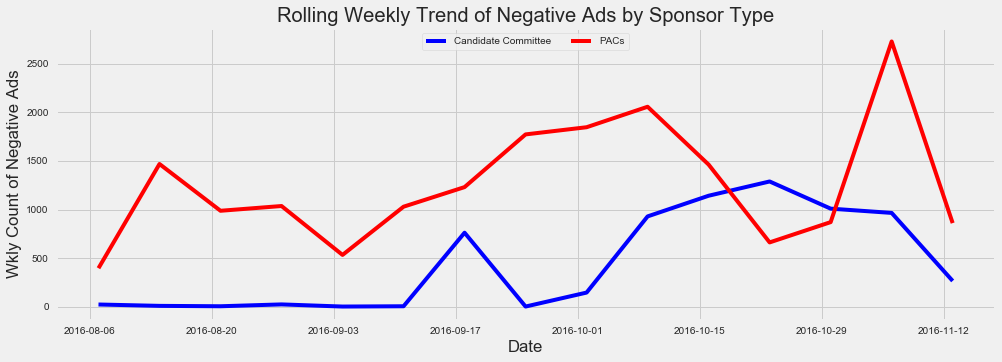

In [46]:
# Who funded the mud? -- Chart

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(neg_ad_candidate.index, neg_ad_candidate.values, '-b', label='Candidate Committee')
ax.plot(neg_ad_PAC.index, neg_ad_PAC.values, '-r', label='PACs')
ax.legend(frameon=True, loc='upper center', ncol=2) # look at doc string, has the legend location codes
ax.set(xlabel='Date', 
       ylabel='Wkly Count of Negative Ads', 
       title='Rolling Weekly Trend of Negative Ads by Sponsor Type')

## Looking at the Sponsors

In [47]:
sponsors_list = list(pres_date_df['sponsors'].unique())
sponsors_list

['Reform America Fund',
 'Hillary for America',
 'Make America Number One',
 'Rebuilding America Now',
 'NextGen California Action Committee',
 'Women Vote!',
 'Reclaim America PAC',
 'Priorities USA Action',
 'Donald J Trump For President',
 'Kirkpatrick For Senate',
 'Friends of Patrick Murphy',
 'MoveOn.org',
 'Our Principles PAC',
 'Correct The Record',
 'Marco Rubio For Senate 2016',
 'Republican National Cmte',
 'Gary Johnson 2016',
 'Great America PAC',
 'Stop Hillary PAC',
 'National Rifle Assn',
 'Ready for Hillary',
 'Democratic Senatorial Campaign Cmte',
 'Purple PAC',
 'Jill Stein for President',
 'Strickland for Senate',
 'Free the Delegates',
 'NARAL Pro-Choice America',
 'American Bridge 21st Century',
 'Hillary Victory Fund',
 'Democratic National Cmte',
 'Fenton Communications Inc',
 'America Rising PAC',
 'NextGen Climate Action',
 'Save the Day PAC',
 'Future45',
 'Donald J. Trump For President',
 'NRA Institute for Legislative Action',
 'iAmerica Action',
 'Internet

In [48]:
pres_date_df['sponsors'].isnull().sum() # gives you the number of NaN's since True = 1

0

In [49]:
# exporting list to CSV - easier to work and annotate in excel

import csv

# commenting out to prevent overwrite of original version

# with open('data/sponsors_list.csv', 'wt') as f:
    # writer = csv.writer(f)
    # for row in sponsors_list:
        # writer.writerow([row])

In [50]:
sponsors_df = pd.read_csv('data/sponsors_list_final.csv', 
                          header=None, 
                          names=['Sponsors', 'Sponsor_Classification'], 
                          index_col='Sponsors')
sponsors_df.head()

Sponsor_Classification
Sponsors                                                  
Reform America Fund                                  R_PAC
Hillary for America                                Clinton
Make America Number One                              R_PAC
Rebuilding America Now                               R_PAC
NextGen California Action Committee                  D_PAC

In [51]:
sponsors_df.values[0:5]

array([['R_PAC'],
       ['Clinton'],
       ['R_PAC'],
       ['R_PAC'],
       ['D_PAC']], dtype=object)

In [52]:
# How to access a cell via an index

sponsors_df['Sponsor_Classification']['Reform America Fund']

'R_PAC'

In [53]:
# creating a mapping dictionary

mapping_dict = {}

for row in sponsors_df.index:
    mapping_dict[row] = sponsors_df['Sponsor_Classification'][row]
    
mapping_dict

{'45 Committee': 'R_PAC',
 'America Rising PAC': 'R_PAC',
 'American Bridge 21st Century': 'D_PAC',
 'American Crossroads': 'R_PAC',
 'Correct The Record': 'D_PAC',
 'Democratic National Cmte': 'D_COM',
 'Democratic Senatorial Campaign Cmte': 'Other',
 'Donald J Trump For President': 'Trump',
 'Donald J. Trump For President': 'Trump',
 'Fenton Communications Inc': 'D_PAC',
 'Fifty Second Street Fund': 'D_PAC',
 'Free the Delegates': 'Other',
 'Friends of Patrick Murphy': 'Other',
 'Future45': 'R_PAC',
 'Gary Johnson 2016': 'Johnson',
 'Great America PAC': 'R_PAC',
 'Hillary Victory Fund': 'D_PAC',
 'Hillary for America': 'Clinton',
 'Internet Archive': 'Other',
 'Jill Stein for President': 'Stein',
 'Kirkpatrick For Senate': 'Other',
 'Local Voices': 'D_PAC',
 'Make America Number One': 'R_PAC',
 'Marco Rubio For Senate 2016': 'Other',
 'MoveOn.org': 'D_PAC',
 'NARAL Pro-Choice America': 'D_PAC',
 'NRA Institute for Legislative Action': 'R_PAC',
 'National Republican Senatorial Cmte': 

In [54]:
# now use 'mapping_dict' to create a new column that you can sort and mask on - first make a copy to be safe

cand_date_df = pres_date_df.copy()
cand_date_df.head()

id  wp_identifier   network  \
start_time                                             
2016-08-01 01:19:59  261456           6035  FOXNEWSW   
2016-08-01 06:20:04  261450           6035  FOXNEWSW   
2016-08-01 08:39:49   48222           4176      WCAU   
2016-08-01 08:48:14   48395           4176       KYW   
2016-08-01 09:09:45  378441           7459    MSNBCW   

                                               location  \
start_time                                                
2016-08-01 01:19:59  San Francisco-Oakland-San Jose, CA   
2016-08-01 06:20:04  San Francisco-Oakland-San Jose, CA   
2016-08-01 08:39:49                    Philadelphia, PA   
2016-08-01 08:48:14                    Philadelphia, PA   
2016-08-01 09:09:45  San Francisco-Oakland-San Jose, CA   

                                                   program program_type  \
start_time                                                                
2016-08-01 01:19:59  On the Record With Greta Van Susteren         news   
2016-08-01 06:20:04     Fox News Sunday With Chris Wallace         news   
2016-08-01 08:39:49              NBC10 News Today at 430am         news   
2016-08-01 08:48:14                 Eyewitness News at 430         news   
2016-08-01 09:09:45                             First Look         news   

                             start_time            end_time  \
start_time                                                    
2016-08-01 01:19:59 2016-08-01 01:19:59 2016-08-01 01:21:04   
2016-08-01 06:20:04 2016-08-01 06:20:04 2016-08-01 06:21:09   
2016-08-01 08:39:49 2016-08-01 08:39:49 2016-08-01 08:40:21   
2016-08-01 08:48:14 2016-08-01 08:48:14 2016-08-01 08:48:46   
2016-08-01 09:09:45 2016-08-01 09:09:45 2016-08-01 09:10:15   

                                     archive_id  \
start_time                                        
2016-08-01 01:19:59  PolAd_HillaryClinton_4drmd   
2016-08-01 06:20:04  PolAd_HillaryClinton_4drmd   
2016-08-01 08:39:49     PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14     PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  PolAd_HillaryClinton_4gvic   

                                                             embed_url  \
start_time                                                               
2016-08-01 01:19:59  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 06:20:04  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 08:39:49  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  https://archive.org/embed/PolAd_HillaryClinton...   

                                    sponsors sponsor_types  race   cycle  \
start_time                                                                 
2016-08-01 01:19:59      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 06:20:04      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 08:39:49      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 08:48:14      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 09:09:45  Make America Number One     Super PAC  PRES  2016.0   

                                                              subjects  \
start_time                                                               
2016-08-01 01:19:59                                Candidate Biography   
2016-08-01 06:20:04                                Candidate Biography   
2016-08-01 08:39:49  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 08:48:14  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 09:09:45                                Candidate Biography   

                          candidates      type message        date_created  \
start_time                                                                   
2016-08-01 01:19:59  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-01 06:20:04  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-0

In [55]:
# use map and 'mapping_dict'

cand_date_df['sponsor_class'] = cand_date_df['sponsors'].map(mapping_dict)
cand_date_df.head()

id  wp_identifier   network  \
start_time                                             
2016-08-01 01:19:59  261456           6035  FOXNEWSW   
2016-08-01 06:20:04  261450           6035  FOXNEWSW   
2016-08-01 08:39:49   48222           4176      WCAU   
2016-08-01 08:48:14   48395           4176       KYW   
2016-08-01 09:09:45  378441           7459    MSNBCW   

                                               location  \
start_time                                                
2016-08-01 01:19:59  San Francisco-Oakland-San Jose, CA   
2016-08-01 06:20:04  San Francisco-Oakland-San Jose, CA   
2016-08-01 08:39:49                    Philadelphia, PA   
2016-08-01 08:48:14                    Philadelphia, PA   
2016-08-01 09:09:45  San Francisco-Oakland-San Jose, CA   

                                                   program program_type  \
start_time                                                                
2016-08-01 01:19:59  On the Record With Greta Van Susteren         news   
2016-08-01 06:20:04     Fox News Sunday With Chris Wallace         news   
2016-08-01 08:39:49              NBC10 News Today at 430am         news   
2016-08-01 08:48:14                 Eyewitness News at 430         news   
2016-08-01 09:09:45                             First Look         news   

                             start_time            end_time  \
start_time                                                    
2016-08-01 01:19:59 2016-08-01 01:19:59 2016-08-01 01:21:04   
2016-08-01 06:20:04 2016-08-01 06:20:04 2016-08-01 06:21:09   
2016-08-01 08:39:49 2016-08-01 08:39:49 2016-08-01 08:40:21   
2016-08-01 08:48:14 2016-08-01 08:48:14 2016-08-01 08:48:46   
2016-08-01 09:09:45 2016-08-01 09:09:45 2016-08-01 09:10:15   

                                     archive_id  \
start_time                                        
2016-08-01 01:19:59  PolAd_HillaryClinton_4drmd   
2016-08-01 06:20:04  PolAd_HillaryClinton_4drmd   
2016-08-01 08:39:49     PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14     PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  PolAd_HillaryClinton_4gvic   

                                                             embed_url  \
start_time                                                               
2016-08-01 01:19:59  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 06:20:04  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 08:39:49  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  https://archive.org/embed/PolAd_HillaryClinton...   

                                    sponsors sponsor_types  race   cycle  \
start_time                                                                 
2016-08-01 01:19:59      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 06:20:04      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 08:39:49      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 08:48:14      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 09:09:45  Make America Number One     Super PAC  PRES  2016.0   

                                                              subjects  \
start_time                                                               
2016-08-01 01:19:59                                Candidate Biography   
2016-08-01 06:20:04                                Candidate Biography   
2016-08-01 08:39:49  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 08:48:14  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 09:09:45                                Candidate Biography   

                          candidates      type message        date_created  \
start_time                                                                   
2016-08-01 01:19:59  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-01 06:20:04  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-0

In [56]:
cand_date_df.shape

(85127, 27)

In [57]:
cand_date_df['sponsor_class'].value_counts()

Clinton    37589
Trump      22918
D_PAC      14877
R_PAC       7602
Other       1778
D_COM        206
Johnson       82
R_COM         72
Stein          3
Name: sponsor_class, dtype: int64

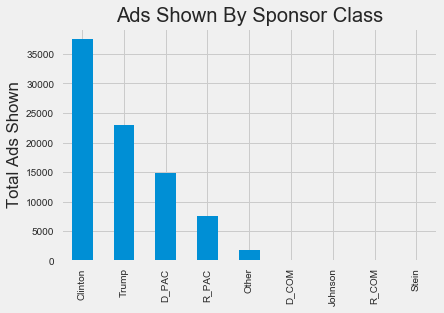

In [58]:
# plot of ads by sponsor class

cand_date_df['sponsor_class'].value_counts().plot(kind='bar')
plt.title("Ads Shown By Sponsor Class")
plt.ylabel("Total Ads Shown")

In [59]:
# cleaning up DataFrame a bit

cand_date_df.drop('split_subjects_tmp', inplace=True, axis=1)
cand_date_df.head()

id  wp_identifier   network  \
start_time                                             
2016-08-01 01:19:59  261456           6035  FOXNEWSW   
2016-08-01 06:20:04  261450           6035  FOXNEWSW   
2016-08-01 08:39:49   48222           4176      WCAU   
2016-08-01 08:48:14   48395           4176       KYW   
2016-08-01 09:09:45  378441           7459    MSNBCW   

                                               location  \
start_time                                                
2016-08-01 01:19:59  San Francisco-Oakland-San Jose, CA   
2016-08-01 06:20:04  San Francisco-Oakland-San Jose, CA   
2016-08-01 08:39:49                    Philadelphia, PA   
2016-08-01 08:48:14                    Philadelphia, PA   
2016-08-01 09:09:45  San Francisco-Oakland-San Jose, CA   

                                                   program program_type  \
start_time                                                                
2016-08-01 01:19:59  On the Record With Greta Van Susteren         news   
2016-08-01 06:20:04     Fox News Sunday With Chris Wallace         news   
2016-08-01 08:39:49              NBC10 News Today at 430am         news   
2016-08-01 08:48:14                 Eyewitness News at 430         news   
2016-08-01 09:09:45                             First Look         news   

                             start_time            end_time  \
start_time                                                    
2016-08-01 01:19:59 2016-08-01 01:19:59 2016-08-01 01:21:04   
2016-08-01 06:20:04 2016-08-01 06:20:04 2016-08-01 06:21:09   
2016-08-01 08:39:49 2016-08-01 08:39:49 2016-08-01 08:40:21   
2016-08-01 08:48:14 2016-08-01 08:48:14 2016-08-01 08:48:46   
2016-08-01 09:09:45 2016-08-01 09:09:45 2016-08-01 09:10:15   

                                     archive_id  \
start_time                                        
2016-08-01 01:19:59  PolAd_HillaryClinton_4drmd   
2016-08-01 06:20:04  PolAd_HillaryClinton_4drmd   
2016-08-01 08:39:49     PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14     PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  PolAd_HillaryClinton_4gvic   

                                                             embed_url  \
start_time                                                               
2016-08-01 01:19:59  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 06:20:04  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 08:39:49  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  https://archive.org/embed/PolAd_HillaryClinton...   

                                    sponsors sponsor_types  race   cycle  \
start_time                                                                 
2016-08-01 01:19:59      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 06:20:04      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 08:39:49      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 08:48:14      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 09:09:45  Make America Number One     Super PAC  PRES  2016.0   

                                                              subjects  \
start_time                                                               
2016-08-01 01:19:59                                Candidate Biography   
2016-08-01 06:20:04                                Candidate Biography   
2016-08-01 08:39:49  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 08:48:14  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 09:09:45                                Candidate Biography   

                          candidates      type message        date_created  \
start_time                                                                   
2016-08-01 01:19:59  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-01 06:20:04  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-0

## Groupbys

In [60]:
# first going to limit the dataset to only the relevant sponsor classes -- get rid of other

cand_date_df = cand_date_df[cand_date_df['sponsor_class'] != 'Other']
cand_date_df.head()

id  wp_identifier   network  \
start_time                                             
2016-08-01 01:19:59  261456           6035  FOXNEWSW   
2016-08-01 06:20:04  261450           6035  FOXNEWSW   
2016-08-01 08:39:49   48222           4176      WCAU   
2016-08-01 08:48:14   48395           4176       KYW   
2016-08-01 09:09:45  378441           7459    MSNBCW   

                                               location  \
start_time                                                
2016-08-01 01:19:59  San Francisco-Oakland-San Jose, CA   
2016-08-01 06:20:04  San Francisco-Oakland-San Jose, CA   
2016-08-01 08:39:49                    Philadelphia, PA   
2016-08-01 08:48:14                    Philadelphia, PA   
2016-08-01 09:09:45  San Francisco-Oakland-San Jose, CA   

                                                   program program_type  \
start_time                                                                
2016-08-01 01:19:59  On the Record With Greta Van Susteren         news   
2016-08-01 06:20:04     Fox News Sunday With Chris Wallace         news   
2016-08-01 08:39:49              NBC10 News Today at 430am         news   
2016-08-01 08:48:14                 Eyewitness News at 430         news   
2016-08-01 09:09:45                             First Look         news   

                             start_time            end_time  \
start_time                                                    
2016-08-01 01:19:59 2016-08-01 01:19:59 2016-08-01 01:21:04   
2016-08-01 06:20:04 2016-08-01 06:20:04 2016-08-01 06:21:09   
2016-08-01 08:39:49 2016-08-01 08:39:49 2016-08-01 08:40:21   
2016-08-01 08:48:14 2016-08-01 08:48:14 2016-08-01 08:48:46   
2016-08-01 09:09:45 2016-08-01 09:09:45 2016-08-01 09:10:15   

                                     archive_id  \
start_time                                        
2016-08-01 01:19:59  PolAd_HillaryClinton_4drmd   
2016-08-01 06:20:04  PolAd_HillaryClinton_4drmd   
2016-08-01 08:39:49     PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14     PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  PolAd_HillaryClinton_4gvic   

                                                             embed_url  \
start_time                                                               
2016-08-01 01:19:59  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 06:20:04  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 08:39:49  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  https://archive.org/embed/PolAd_HillaryClinton...   

                                    sponsors sponsor_types  race   cycle  \
start_time                                                                 
2016-08-01 01:19:59      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 06:20:04      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 08:39:49      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 08:48:14      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 09:09:45  Make America Number One     Super PAC  PRES  2016.0   

                                                              subjects  \
start_time                                                               
2016-08-01 01:19:59                                Candidate Biography   
2016-08-01 06:20:04                                Candidate Biography   
2016-08-01 08:39:49  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 08:48:14  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 09:09:45                                Candidate Biography   

                          candidates      type message        date_created  \
start_time                                                                   
2016-08-01 01:19:59  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-01 06:20:04  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-0

In [61]:
cand_date_df.shape

(83349, 26)

In [62]:
# if mask worked correctly - 1778

85127 - 83349

1778

In [63]:
# Going to make a masking dictionary again - Party

cand_date_df['sponsor_class'].value_counts()

Clinton    37589
Trump      22918
D_PAC      14877
R_PAC       7602
D_COM        206
Johnson       82
R_COM         72
Stein          3
Name: sponsor_class, dtype: int64

In [64]:
party_dict = {'Clinton': 'D',
              'Trump': 'R',
              'D_PAC': 'D',
              'R_PAC': 'R',
              'D_COM': 'D',
              'Johnson': 'I',
              'R_COM': 'R',
              'Stein': 'I'
             }

In [65]:
# use map and 'party_dict'

cand_date_df['party'] = cand_date_df['sponsor_class'].map(party_dict)
cand_date_df.head()

id  wp_identifier   network  \
start_time                                             
2016-08-01 01:19:59  261456           6035  FOXNEWSW   
2016-08-01 06:20:04  261450           6035  FOXNEWSW   
2016-08-01 08:39:49   48222           4176      WCAU   
2016-08-01 08:48:14   48395           4176       KYW   
2016-08-01 09:09:45  378441           7459    MSNBCW   

                                               location  \
start_time                                                
2016-08-01 01:19:59  San Francisco-Oakland-San Jose, CA   
2016-08-01 06:20:04  San Francisco-Oakland-San Jose, CA   
2016-08-01 08:39:49                    Philadelphia, PA   
2016-08-01 08:48:14                    Philadelphia, PA   
2016-08-01 09:09:45  San Francisco-Oakland-San Jose, CA   

                                                   program program_type  \
start_time                                                                
2016-08-01 01:19:59  On the Record With Greta Van Susteren         news   
2016-08-01 06:20:04     Fox News Sunday With Chris Wallace         news   
2016-08-01 08:39:49              NBC10 News Today at 430am         news   
2016-08-01 08:48:14                 Eyewitness News at 430         news   
2016-08-01 09:09:45                             First Look         news   

                             start_time            end_time  \
start_time                                                    
2016-08-01 01:19:59 2016-08-01 01:19:59 2016-08-01 01:21:04   
2016-08-01 06:20:04 2016-08-01 06:20:04 2016-08-01 06:21:09   
2016-08-01 08:39:49 2016-08-01 08:39:49 2016-08-01 08:40:21   
2016-08-01 08:48:14 2016-08-01 08:48:14 2016-08-01 08:48:46   
2016-08-01 09:09:45 2016-08-01 09:09:45 2016-08-01 09:10:15   

                                     archive_id  \
start_time                                        
2016-08-01 01:19:59  PolAd_HillaryClinton_4drmd   
2016-08-01 06:20:04  PolAd_HillaryClinton_4drmd   
2016-08-01 08:39:49     PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14     PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  PolAd_HillaryClinton_4gvic   

                                                             embed_url  \
start_time                                                               
2016-08-01 01:19:59  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 06:20:04  https://archive.org/embed/PolAd_HillaryClinton...   
2016-08-01 08:39:49  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 08:48:14  https://archive.org/embed/PolAd_DonaldTrump_99k4w   
2016-08-01 09:09:45  https://archive.org/embed/PolAd_HillaryClinton...   

                                    sponsors sponsor_types  race   cycle  \
start_time                                                                 
2016-08-01 01:19:59      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 06:20:04      Reform America Fund     Super PAC  PRES  2016.0   
2016-08-01 08:39:49      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 08:48:14      Hillary for America      Multiple  PRES  2016.0   
2016-08-01 09:09:45  Make America Number One     Super PAC  PRES  2016.0   

                                                              subjects  \
start_time                                                               
2016-08-01 01:19:59                                Candidate Biography   
2016-08-01 06:20:04                                Candidate Biography   
2016-08-01 08:39:49  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 08:48:14  Candidate Biography, Foreign Policy, Nuclear, ...   
2016-08-01 09:09:45                                Candidate Biography   

                          candidates      type message        date_created  \
start_time                                                                   
2016-08-01 01:19:59  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-01 06:20:04  Hillary Clinton  campaign     con 2016-09-21 10:40:12   
2016-08-0

## Pickling Dataframe - Sorted with Sponsors and Party Columns Added

In [93]:
# commenting out to prevent over-write -- it is in the data folder

# cand_date_df.to_pickle('data/pres_sorted_with_sponsors_and_party.pickle')

In [67]:
cand_date_df.groupby(['party', 'message'])['message'].count()#.plot(kind='bar')

party  message
D      con        34037
       mixed       8600
       pro         8902
       unknown     1133
I      mixed          5
       pro           80
R      con        12821
       mixed      12352
       pro         5419
Name: message, dtype: int64

In [68]:
cand_date_df.groupby(['party', 'message'])['id'].count().unstack() # this looks better than above 
# Chapter 4 - page 171 - equivalent to a pivot table by hand

message      con    mixed     pro  unknown
party                                     
D        34037.0   8600.0  8902.0   1133.0
I            NaN      5.0    80.0      NaN
R        12821.0  12352.0  5419.0      NaN

In [69]:
cand_date_df.pivot_table('id', index='party', columns='message', aggfunc='count', margins=True) 
# Equivalent to groupby above -- the margins=True - sums across for totals
# Can set margin_label from default 'All' to 'margins_name' = 'X'
# Can specify mapping for the aggfunc via a dictionary e.g. aggfunc = {'survived': np.sum, 'fare': 'mean' (pandas)}
# when you specify the mapping for aggfunc, values is specified
# Chapter 4 - page 173

message      con    mixed      pro  unknown      All
party                                               
D        34037.0   8600.0   8902.0   1133.0  52672.0
I            NaN      5.0     80.0      NaN     85.0
R        12821.0  12352.0   5419.0      NaN  30592.0
All      46858.0  20957.0  14401.0   1133.0  83349.0

In [70]:
# Democratic Ads by State and Mix -- need to add titles, legend, axis labels

cand_date_df[cand_date_df['party'] == 'D'].groupby(['state', 'message'])['id'].count().unstack()

message      con   mixed     pro  unknown
state                                    
AZ        1802.0   464.0   484.0      NaN
CO        1565.0    26.0    35.0      NaN
FL        5020.0  1644.0  1358.0      NaN
IA        2179.0   807.0   828.0      NaN
NC        3006.0   789.0  1128.0      NaN
NH        1939.0   441.0   364.0      NaN
NV        4872.0  1579.0  1445.0      NaN
NY          21.0     NaN    20.0      NaN
National  2528.0   425.0   540.0   1132.0
OH        4253.0  1061.0  1226.0      1.0
PA        5306.0  1209.0  1367.0      NaN
VA         485.0    25.0    27.0      NaN
WI        1061.0   130.0    80.0      NaN

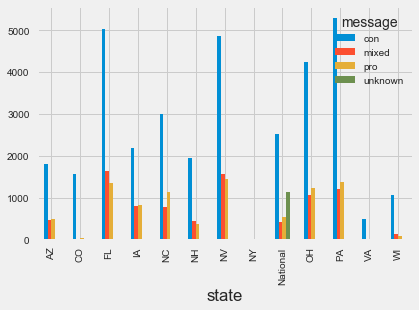

In [71]:
# Democratic Ads by State and Mix -- need to add titles, legend (and position), axis labels (change size??)

cand_date_df[cand_date_df['party'] == 'D'].groupby(['state', 'message'])['id'].count().unstack().plot(kind='bar')

In [72]:
test_gb = cand_date_df[cand_date_df['party'] == 'D'].groupby(['state', 'message'])
test_gb.groups

{('AZ', 'con'): DatetimeIndex(['2016-08-08 00:13:47', '2016-08-08 04:16:45',
                '2016-08-08 05:13:16', '2016-08-08 07:14:44',
                '2016-08-09 20:23:00', '2016-08-10 04:19:04',
                '2016-08-10 14:53:32', '2016-08-11 06:41:30',
                '2016-08-11 17:41:25', '2016-08-13 04:30:03',
                ...
                '2016-11-08 18:52:59', '2016-11-08 18:59:40',
                '2016-11-08 19:56:30', '2016-11-08 20:59:36',
                '2016-11-08 21:55:47', '2016-11-08 22:29:31',
                '2016-11-08 22:39:31', '2016-11-08 23:16:03',
                '2016-11-08 23:29:00', '2016-11-08 23:38:37'],
               dtype='datetime64[ns]', name='start_time', length=1802, freq=None),
 ('AZ', 'mixed'): DatetimeIndex(['2016-09-02 15:54:19', '2016-09-02 22:19:29',
                '2016-09-03 05:32:10', '2016-09-04 13:56:26',
                '2016-09-04 14:35:33', '2016-09-04 14:59:04',
                '2016-09-05 00:09:32', '2016-09-05 09:35:4

In [73]:
test_gb.get_group(('AZ', 'con'))

id  wp_identifier network              location  \
start_time                                                                 
2016-08-08 00:13:47   41465           4664    KSAZ  Phoenix-Prescott, AZ   
2016-08-08 04:16:45   41466           4664    KSAZ  Phoenix-Prescott, AZ   
2016-08-08 05:13:16   41468           4664    KSAZ  Phoenix-Prescott, AZ   
2016-08-08 07:14:44   41463           4664    KSAZ  Phoenix-Prescott, AZ   
2016-08-09 20:23:00   43637           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-10 04:19:04   43400           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-10 14:53:32   41421           4664    KPNX  Phoenix-Prescott, AZ   
2016-08-11 06:41:30   35278           4852    KNXV  Phoenix-Prescott, AZ   
2016-08-11 17:41:25   43608           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-13 04:30:03   43253           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-14 03:28:14   43205           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-14 08:48:48   42941           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-14 14:53:44   43358           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-14 17:20:41   43336           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-15 04:59:21   42891           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-15 09:29:19   43557           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-16 20:02:51   43490           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-19 02:52:33   43077           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-19 08:05:12   42953           4682    KPNX  Phoenix-Prescott, AZ   
2016-08-22 14:06:30   26244           5025    KNXV  Phoenix-Prescott, AZ   
2016-08-23 11:02:38   19974           5098    KPNX  Phoenix-Prescott, AZ   
2016-09-02 12:52:35   44129           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-02 14:28:07   44128           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-02 15:19:57   44127           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-02 16:55:11   44126           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-02 16:59:41   44125           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-02 17:49:42   44124           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-02 18:54:53   44123           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-02 21:55:32   44122           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-02 22:40:29   44119           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-02 22:48:54   44120           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-02 23:25:03   44121           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-02 23:47:34   44118           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-02 23:55:07   44117           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-03 00:13:02   44116           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-03 00:23:10   44115           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-03 00:50:42   44114           4685    KPNX  Phoenix-Prescott, AZ   
2016-09-03 01:24:33   44113           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-03 05:28:39   44321           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-03 07:22:09   44112           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-03 08:33:41   44111           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-03 13:21:31   44110           4685    KPNX  Phoenix-Prescott, AZ   
2016-09-03 13:28:57   44109           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-03 14:26:50   44108           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-04 00:23:20   44107           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-04 04:28:38   44106           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-04 05:39:48   44105           4685    KSAZ  Phoenix-Prescott, AZ   
2016-09-04 05:47:02   44104           4685    KPNX  Phoenix-Prescott, AZ   
2016-09-04 08:07:36   44103           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-04 08:28:49   44102           4685    KNXV  Phoenix-Prescott, AZ   
2016-09-04 12:29:39   44099           4685    KNXV  Phoenix-Prescott, AZ 

In [74]:
# Democratic con votes in Ohio -- do not have to use a groupby - resample and plot and compare to pro
# Another idea is to look at pro/con ratio - pac non pac

party_df = cand_date_df.copy()[(cand_date_df['party'] == 'D') &
                               (cand_date_df['message'] == 'con') &
                               (cand_date_df['state'] == 'OH')]

party_df.head()

id  wp_identifier network         location  \
start_time                                                           
2016-08-07 22:09:46  41485           4664    WEWS  Cleveland, Ohio   
2016-08-07 22:11:16  37515           4621    WEWS  Cleveland, Ohio   
2016-08-07 22:22:02  37516           4621    WKYC  Cleveland, Ohio   
2016-08-07 22:39:17  37512           4621    WOIO  Cleveland, Ohio   
2016-08-07 22:58:37  37511           4621    WOIO  Cleveland, Ohio   

                                        program program_type  \
start_time                                                     
2016-08-07 22:09:46       News Channel 5 at 6pm         news   
2016-08-07 22:11:16       News Channel 5 at 6pm         news   
2016-08-07 22:22:02         Channel 3 News at 6         news   
2016-08-07 22:39:17  Cleveland 19 News at 630PM         news   
2016-08-07 22:58:37  Cleveland 19 News at 630PM         news   

                             start_time            end_time  \
start_time                                                    
2016-08-07 22:09:46 2016-08-07 22:09:46 2016-08-07 22:10:46   
2016-08-07 22:11:16 2016-08-07 22:11:16 2016-08-07 22:11:46   
2016-08-07 22:22:02 2016-08-07 22:22:02 2016-08-07 22:22:32   
2016-08-07 22:39:17 2016-08-07 22:39:17 2016-08-07 22:39:47   
2016-08-07 22:58:37 2016-08-07 22:58:37 2016-08-07 22:59:07   

                                  archive_id  \
start_time                                     
2016-08-07 22:09:46  PolAd_DonaldTrump_wh7bg   
2016-08-07 22:11:16  PolAd_DonaldTrump_59gco   
2016-08-07 22:22:02  PolAd_DonaldTrump_59gco   
2016-08-07 22:39:17  PolAd_DonaldTrump_59gco   
2016-08-07 22:58:37  PolAd_DonaldTrump_59gco   

                                                             embed_url  \
start_time                                                               
2016-08-07 22:09:46  https://archive.org/embed/PolAd_DonaldTrump_wh7bg   
2016-08-07 22:11:16  https://archive.org/embed/PolAd_DonaldTrump_59gco   
2016-08-07 22:22:02  https://archive.org/embed/PolAd_DonaldTrump_59gco   
2016-08-07 22:39:17  https://archive.org/embed/PolAd_DonaldTrump_59gco   
2016-08-07 22:58:37  https://archive.org/embed/PolAd_DonaldTrump_59gco   

                                  sponsors sponsor_types  race   cycle  \
start_time                                                               
2016-08-07 22:09:46  Priorities USA Action     Super PAC  PRES  2016.0   
2016-08-07 22:11:16            Women Vote!     Super PAC  PRES  2016.0   
2016-08-07 22:22:02            Women Vote!     Super PAC  PRES  2016.0   
2016-08-07 22:39:17            Women Vote!     Super PAC  PRES  2016.0   
2016-08-07 22:58:37            Women Vote!     Super PAC  PRES  2016.0   

                                                    subjects    candidates  \
start_time                                                                   
2016-08-07 22:09:46  Military, Veterans, Candidate Biography  Donald Trump   
2016-08-07 22:11:16  Veterans, Candidate Biography, Military  Donald Trump   
2016-08-07 22:22:02  Veterans, Candidate Biography, Military  Donald Trump   
2016-08-07 22:39:17  Veterans, Candidate Biography, Military  Donald Trump   
2016-08-07 22:58:37  Veterans, Candidate Biography, Military  Donald Trump   

                         type message        date_created  ad_length  \
start_time                                                             
2016-08-07 22:09:46  campaign     con 2016-09-12 14:51:27       60.0   
2016-08-07 22:11:16  campaign     con 2016-09-12 14:51:15       30.0   
2016-08-07 22:22:02  campaign     con 2016-09-12 14:51:15       30.0   
2016-08-07 22:39:17  campaign     con 2016-09-12 14:51:15       30.0   
2016-08-07 22:58:37  campaign     con 2016-09-12 14:51:15       30.0   

                    day_of_week metro_area state  subject_count  hour_aired  \
start_time                                                                    
2016-08-07 22:09:46      Sunday  Cleveland    OH         

In [75]:
party_df.shape

(4253, 27)

In [76]:
# may have a conflict in indexes when try to plot D versus R in the same plot, becuase they have different time indexes

In [77]:
cand_date_df['state'].value_counts()

FL          12284
PA          11915
NV          10928
OH          10322
National     7217
NC           6722
IA           5284
NH           4963
CO           4689
WI           4065
AZ           3219
VA           1695
NY             46
Name: state, dtype: int64

In [78]:
# Reading in state polls data

state_polls = pd.read_csv('data/rcp_state_polls.csv', parse_dates=['Date'], index_col='Date')

In [79]:
state_polls.head()

OH_Clinton  OH_Trump  FL_Clinton  FL_Trump  MI_Clinton  MI_Trump  \
Date                                                                           
2016-08-01        40.0      38.6        41.3      41.5        37.7      34.0   
2016-08-08        41.8      39.6        43.0      41.4        39.4      33.2   
2016-08-15        41.8      39.6        44.2      40.2        40.0      33.0   
2016-08-22        43.0      39.0        44.2      40.2        42.5      34.0   
2016-08-29        43.0      39.8        44.3      40.7        43.4      34.8   

            WI_Clinton  WI_Trump  VA_Clinton  VA_Trump  NC_Clinton  NC_Trump  \
Date                                                                           
2016-08-01        42.0      36.5        40.7      35.7         NaN       NaN   
2016-08-08        42.0      36.5        42.8      36.0        42.3      41.8   
2016-08-15        44.0      35.0        46.0      35.7        43.0      41.8   
2016-08-22        44.0      35.0        42.2      34.6        42.0      41.2   
2016-08-29        44.0      35.0        45.5      34.0        42.8      41.5   

            CO_Clinton  CO_Trump  IA_Clinton  IA_Trump  NV_Clinton  NV_Trump  \
Date                                                                           
2016-08-01        40.8      33.5        39.3      39.5        43.0      40.5   
2016-08-08        41.3      32.0        38.8      39.0        43.0      40.7   
2016-08-15        42.0      30.7        38.7      38.7        43.3      41.0   
2016-08-22        41.8      31.3        38.0      37.8        43.3      41.0   
2016-08-29        41.8      31.3        38.0      37.8        43.3      41.0   

            AZ_Clinton  AZ_Trump  
Date                              
2016-08-01         NaN       NaN  
2016-08-08         NaN       NaN  
2016-08-15         NaN       NaN  
2016-08-22         NaN       NaN  
2016-08-29        40.0      42.7

In [80]:
state_polls.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2016-08-01 to NaT
Data columns (total 20 columns):
OH_Clinton    16 non-null float64
OH_Trump      16 non-null float64
FL_Clinton    16 non-null float64
FL_Trump      16 non-null float64
MI_Clinton    16 non-null float64
MI_Trump      16 non-null float64
WI_Clinton    16 non-null float64
WI_Trump      16 non-null float64
VA_Clinton    16 non-null float64
VA_Trump      16 non-null float64
NC_Clinton    15 non-null float64
NC_Trump      15 non-null float64
CO_Clinton    16 non-null float64
CO_Trump      16 non-null float64
IA_Clinton    16 non-null float64
IA_Trump      16 non-null float64
NV_Clinton    16 non-null float64
NV_Trump      16 non-null float64
AZ_Clinton    12 non-null float64
AZ_Trump      12 non-null float64
dtypes: float64(20)
memory usage: 2.8 KB


## Digging into Messaging and Looking at State Polls

In [81]:
dem_pro_OH = cand_date_df.copy()['party'][(cand_date_df['party'] == 'D') &
                                          (cand_date_df['message'] == 'pro') &
                                          (cand_date_df['state'] == 'OH')]

In [82]:
dem_pro_OH.shape

(1226,)

In [83]:
dem_pro_OH.head()

start_time
2016-08-08 10:20:46    D
2016-08-08 12:27:44    D
2016-08-08 14:56:01    D
2016-08-08 21:41:56    D
2016-08-08 22:11:22    D
Name: party, dtype: object

In [84]:
dem_con_OH = cand_date_df.copy()['party'][(cand_date_df['party'] == 'D') &
                                          (cand_date_df['message'] == 'con') &
                                          (cand_date_df['state'] == 'OH')]

In [85]:
dem_con_OH.shape

(4253,)

In [86]:
sum(dem_pro_OH.resample('D').count())

1226

In [87]:
sum(dem_con_OH.resample('D').count())

4253

In [88]:
dem_pro_OH = cand_date_df.copy()['party'][(cand_date_df['party'] == 'D') &
                                          (cand_date_df['message'] == 'pro') &
                                          (cand_date_df['state'] == 'OH')].resample('D').count()

dem_con_OH = cand_date_df.copy()['party'][(cand_date_df['party'] == 'D') &
                                          (cand_date_df['message'] == 'con') &
                                          (cand_date_df['state'] == 'OH')].resample('D').count()

dem_negratio_OH = (1 - (dem_pro_OH / (dem_pro_OH + dem_con_OH))) * 100

rep_pro_OH = cand_date_df.copy()['party'][(cand_date_df['party'] == 'R') &
                                          (cand_date_df['message'] == 'pro') &
                                          (cand_date_df['state'] == 'OH')].resample('D').count()

rep_con_OH = cand_date_df.copy()['party'][(cand_date_df['party'] == 'R') &
                                          (cand_date_df['message'] == 'con') &
                                          (cand_date_df['state'] == 'OH')].resample('D').count()

rep_negratio_OH = (1 - (rep_pro_OH / (rep_pro_OH + dem_con_OH))) * 100

In [89]:
dem_negratio_OH

start_time
2016-08-07           NaN
2016-08-08     85.000000
2016-08-09     80.246914
2016-08-10     78.260870
2016-08-11     70.689655
2016-08-12     79.310345
2016-08-13     68.421053
2016-08-14     79.545455
2016-08-15     78.313253
2016-08-16     57.407407
2016-08-17     60.000000
2016-08-18     53.125000
2016-08-19     58.620690
2016-08-20     41.666667
2016-08-21     52.173913
2016-08-22     60.000000
2016-08-23     62.857143
2016-08-24     61.290323
2016-08-25     65.909091
2016-08-26     60.416667
2016-08-27     61.111111
2016-08-28     63.157895
2016-08-29     67.058824
2016-08-30     73.255814
2016-08-31     72.727273
2016-09-01     73.529412
2016-09-02     70.769231
2016-09-03     66.666667
2016-09-04     54.545455
2016-09-05     54.166667
2016-09-06     75.409836
2016-09-07     76.859504
2016-09-08     75.238095
2016-09-09     77.000000
2016-09-10     77.419355
2016-09-11    100.000000
2016-09-12    100.000000
2016-09-13    100.000000
2016-09-14    100.000000
2016-09-15    

In [90]:
rep_negratio_OH

start_time
2016-08-07           NaN
2016-08-08     92.727273
2016-08-09     92.857143
2016-08-10     98.181818
2016-08-11    100.000000
2016-08-12     92.000000
2016-08-13    100.000000
2016-08-14     97.222222
2016-08-15    100.000000
2016-08-16    100.000000
2016-08-17    100.000000
2016-08-18    100.000000
2016-08-19    100.000000
2016-08-20    100.000000
2016-08-21    100.000000
2016-08-22    100.000000
2016-08-23    100.000000
2016-08-24    100.000000
2016-08-25    100.000000
2016-08-26    100.000000
2016-08-27    100.000000
2016-08-28    100.000000
2016-08-29    100.000000
2016-08-30    100.000000
2016-08-31    100.000000
2016-09-01    100.000000
2016-09-02    100.000000
2016-09-03    100.000000
2016-09-04    100.000000
2016-09-05    100.000000
2016-09-06    100.000000
2016-09-07    100.000000
2016-09-08    100.000000
2016-09-09    100.000000
2016-09-10    100.000000
2016-09-11    100.000000
2016-09-12    100.000000
2016-09-13    100.000000
2016-09-14    100.000000
2016-09-15    

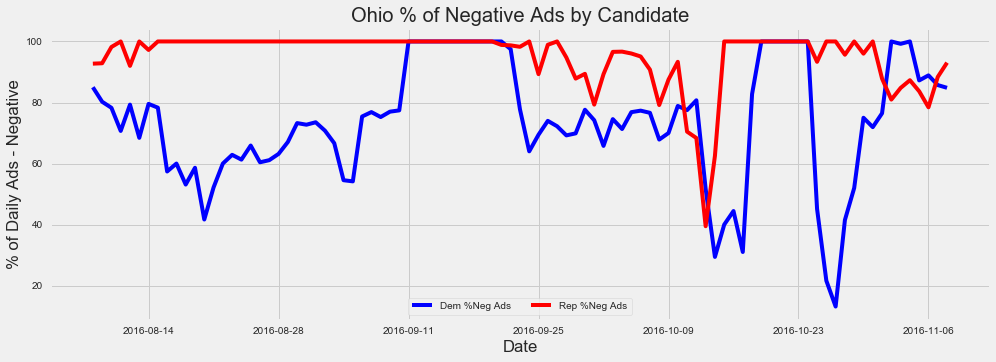

In [91]:
# Ohio

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(dem_negratio_OH.index, dem_negratio_OH.values, '-b', label='Dem %Neg Ads')
ax.plot(rep_negratio_OH.index, rep_negratio_OH.values, '-r', label='Rep %Neg Ads')
ax.legend(frameon=True, loc='lower center', ncol=2) # look at doc string, has the legend location codes
ax.set(xlabel='Date', 
       ylabel='% of Daily Ads - Negative', 
       title='Ohio % of Negative Ads by Candidate')